# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
crpto_value = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current total value of your crpto is ${crpto_value:0.2f}")

The current value of your 1.2 BTC is $24346.80
The current value of your 5.3 ETH is $8693.75
The current total value of your crpto is $33040.55


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
type(alpaca_api_key)

str

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-09-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-08", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date,

).df

# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_data[ticker_data["symbol"] == "AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"] == "SPY"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames
ticker_data = pd.concat([AGG, SPY], axis = 1, join="inner", keys=["AGG", "SPY"])
ticker_data


AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2022-09-08 04:00:00+00:00  100.0  100.18  99.785  99.79  5409039       15792   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-09-08 04:00:00+00:00  99.984992  395.45  400.86  394.12  400.38   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-09-08 04:00:00+00:00  80177250      549029  398.315491

In [9]:

# Pick AGG and SPY close prices
agg_close_price = ticker_data.iloc[0][3]
spy_close_price = ticker_data.iloc[0][10]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.79
Current SPY closing price: $400.38


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
share_value = my_agg_value + my_spy_value
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current total value of your shares is ${share_value:0.2f}")

The current value of your 50 SPY shares is $20019.00
The current value of your 200 AGG shares is $19958.00
The current total value of your shares is $39977.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
share_value = my_agg_value + my_spy_value
crpto_value = my_btc_value + my_eth_value
total_value = share_value + crpto_value
# Create savings DataFrame
df_savings = pd.DataFrame({"Amount": [share_value, crpto_value ]}, index=['crypto','shares'])

# Display savings DataFrame
df_savings

Amount
crypto  39977.000
shares  33040.549

<AxesSubplot:ylabel='Amount'>

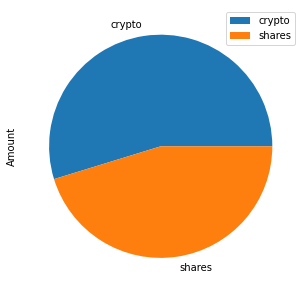

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', figsize = (5, 10))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_value = share_value + crpto_value
print(f"The total value of your combined portfolio is ${total_value:0.2f}")
# Validate saving health
if emergency_fund < total_value:
    print("Nice work you thrifty bugger!")
elif emergency_fund > total_value:
    print("Uh-oh....Keep saving buddy")
elif emergency_fund == total_value:
    print("on the tip of a knifes edge")
        

The total value of your combined portfolio is $73017.55
Nice work you thrifty bugger!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-08', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-08', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
his_stock_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = his_stock_data[his_stock_data["symbol"] == "AGG"].drop("symbol", axis=1)
SPY = his_stock_data[his_stock_data["symbol"] == "SPY"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames

his_stock_data = pd.concat([AGG, SPY], axis = 1, join="inner", keys=["AGG", "SPY"])


# Display sample data
his_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-08 04:00:00+00:00  110.54  110.58  110.43  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-08 04:00:00+00:00        9370  110.471812  246.54  247.11  246.30   
2017-09-11 04:00:00+00:00       10614  110.194231  248.04  249.30  248.02   
2017-09-12 04:00:00+00:00        8614  109.979269  249.64  250.09  249.42   
2017-09-13 04:00:00+00:00        6565  109.926598  249.73  250.21  249.59   
2017-09-14 04:00:00+00:00        7111  109.914840  249.83  250.32  249.60   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-08 04:00:00+00:00  246.58  63832825      185692  246.653947  
2017-09-11 04:00:00+00:00  249.21  71364848      211601  248.758253  
2017-09-12 04:00:00+00:00  250.05  56896027      192649  249.791314  
2017-09-13 04:00:00+00:00  250.17  59228002      147055  250.040408  
2017-09-14 04:00:00+00:00  250.09  95446349      188794  250.052841

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = his_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_stock_data.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-08 04:00:00+00:00  110.54  110.58  110.43  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-08 04:00:00+00:00        9370  110.471812          NaN  246.54   
2017-09-11 04:00:00+00:00       10614  110.194231    -0.002716  248.04   
2017-09-12 04:00:00+00:00        8614  109.979269    -0.001453  249.64   
2017-09-13 04:00:00+00:00        6565  109.926598    -0.001000  249.73   
2017-09-14 04:00:00+00:00        7111  109.914840     0.000546  249.83   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-09-08 04:00:00+00:00  247.11  246.30  246.58  63832825      185692   
2017-09-11 04:00:00+00:00  249.30  248.02  249.21  71364848      211601   
2017-09-12 04:00:00+00:00  250.09  249.42  250.05  56896027      192649   
2017-09-13 04:00:00+00:00  250.21  249.59  250.17  59228002      147055   
2017-09-14 04:00:00+00:00  250.32  249.60  250.09  95446349      188794   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-08 04:00:00+00:00  246.653947          NaN  
2017-09-11 04:00:00+00:00  248.758253     0.010666  
2017-09-12 04:00:00+00:00  249.791314     0.003371  
2017-09-13 04:00:00+00:00  250.040408     0.000480  
2017-09-14 04:00:00+00:00  250.052841    -0.000320

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 110.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 120.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 130.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 140.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 150.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 160.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 170.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 180.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 190.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 200.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 210.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 220.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 230.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 240.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 250.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 260.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 270.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 280.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 290.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 300.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 310.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 320.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 330.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 340.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 350.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 360.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 370.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 380.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 390.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 400.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 410.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 420.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 430.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 440.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 450.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 460.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 470.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 480.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 490.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

0         1         2          3         4         5         6    \
0     1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1     0.998094  1.003647  0.986978   0.994383  0.994450  1.013543  0.991588   
2     1.007082  0.992792  0.994994   0.984314  0.994388  1.022493  1.001367   
3     1.006815  1.002549  0.986398   0.988564  0.998198  1.016373  0.992947   
4     1.003090  1.003630  0.978362   0.981800  1.005440  1.015110  1.005232   
...        ...       ...       ...        ...       ...       ...       ...   
7556  5.763668  3.078991  6.749401  11.106315  6.328026  2.705586  3.692223   
7557  5.725780  3.130303  6.778601  11.194312  6.363210  2.709385  3.686915   
7558  5.694852  3.134247  6.823681  11.149410  6.413163  2.684662  3.685671   
7559  5.706929  3.145978  6.802412  11.185162  6.452384  2.630451  3.689187   
7560  5.669277  3.146968  6.835404  11.090675  6.488533  2.635462  3.700285   

            7         8         9    ...       490        491       492  \
0      1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1      0.999400  1.003142  1.003149  ...  0.993852   1.000187  1.011796   
2      0.988881  1.002104  1.005610  ...  0.998231   1.000001  1.023179   
3      0.991344  1.001228  1.005020  ...  0.997378   0.996294  1.024406   
4      0.991539  1.007010  1.002769  ...  1.003666   1.004944  1.031962   
...         ...       ...       ...  ...       ...        ...       ...   
7556  10.168360  4.933523  6.916817  ...  6.676811  31.937522  4.820633   
7557  10.144781  5.000286  6.928748  ...  6.640819  31.818701  4.838295   
7558   9.997013  5.073112  6.963557  ...  6.657314  31.818464  4.857441   
7559  10.014862  5.140251  6.969638  ...  6.656426  31.342164  4.881357   
7560  10.068628  5.188127  6.941702  ...  6.653454  31.471389  4.899085   

           493       494        495       496       497       498       499  
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.996310  0.990712   1.011652  1.001110  1.003534  1.000230  1.001145  
2     0.993716  0.996428   1.000698  1.014033  0.999436  0.994915  0.989203  
3     0.982864  0.986066   0.991443  1.010940  1.000244  0.989340  0.986340  
4     0.978791  0.994418   0.999816  1.013917  0.998797  0.985941  0.995848  
...        ...       ...        ...       ...       ...       ...       ...  
7556  6.251773  2.062012  14.014873  2.260116  4.591801  2.371543  9.081366  
7557  6.235407  2.091127  14.102723  2.277624  4.592420  2.385914  9.171053  
7558  6.185171  2.102227  13.966212  2.287083  4.634182  2.398224  9.136185  
7559  6.165274  2.105049  13.807285  2.301259  4.647295  2.390656  9.056229  
7560  6.111376  2.126521  13.762446  2.311989  4.602476  2.390746  9.185728  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

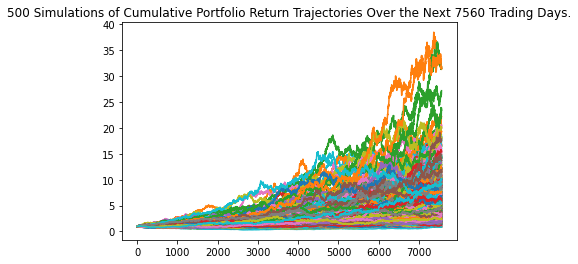

In [24]:
# Plot simulation outcomes
MC_stock_data.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

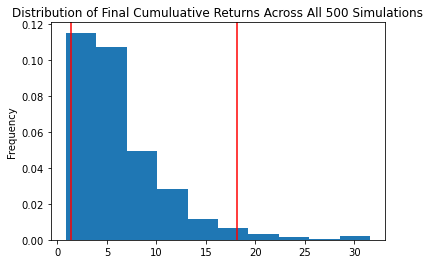

In [25]:
# Plot probability distribution and confidence intervals
MC_stock_data.plot_distribution()

### Retirement Analysis

In [132]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              7.151484
std               5.801738
min               0.707654
25%               3.466054
50%               5.615467
75%               8.840796
max              49.243357
95% CI Lower      1.346514
95% CI Upper     23.838610
Name: 7560, dtype: float64


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [133]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8] * initial_investment)
even_ci_upper = round(even_tbl[9] * initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26930 and $476772


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [134]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
even_ci_lower = round(even_tbl[8] * initial_investment)
even_ci_upper = round(even_tbl[9] * initial_investment)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40395 and $715158


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [22]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data_5 = MCSimulation(
    portfolio_data = his_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [23]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 110.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 120.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 130.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 140.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 150.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 160.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 170.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 180.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 190.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 200.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 210.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 220.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 230.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 240.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 250.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 260.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 270.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 280.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 290.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 300.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 310.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 320.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 330.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 340.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 350.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 360.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 370.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 380.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 390.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 400.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 410.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 420.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 430.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 440.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 450.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 460.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 470.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 480.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 490.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004905  0.991584  1.000519  0.990372  0.997421  0.988965  1.005929   
2     0.992415  1.003210  0.993792  1.000982  1.000225  0.983005  0.996540   
3     0.979831  1.012812  0.981550  0.998570  1.009553  0.971341  0.987291   
4     0.973378  1.011733  0.973451  0.991216  1.013029  0.963919  0.983242   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.625453  0.915762  1.733788  1.507288  1.761409  1.695955  1.085430   
1257  1.625785  0.913399  1.754304  1.510500  1.742660  1.696553  1.093814   
1258  1.638452  0.899095  1.761060  1.496251  1.740063  1.688558  1.093648   
1259  1.632986  0.894420  1.736976  1.515053  1.725319  1.689563  1.098916   
1260  1.646503  0.906041  1.737061  1.512576  1.730225  1.695225  1.089853   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997975  1.011907  1.008029  ...  1.000276  0.990882  1.007077   
2     0.994573  0.999618  1.004417  ...  0.995482  0.986364  1.003259   
3     1.009231  1.006348  1.006672  ...  1.000036  0.977114  1.017870   
4     1.014938  0.998779  1.009703  ...  1.002662  0.998389  1.018125   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.759260  1.283657  1.154831  ...  1.657720  1.704224  1.429973   
1257  1.756322  1.259825  1.157533  ...  1.671611  1.709818  1.419184   
1258  1.759529  1.249547  1.152294  ...  1.651356  1.706226  1.435833   
1259  1.755990  1.257397  1.161926  ...  1.662964  1.710481  1.421359   
1260  1.758254  1.257639  1.152351  ...  1.679774  1.712641  1.418887   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002878  1.007202  1.007746  1.020936  1.007979  1.000417  1.010490  
2     0.991010  1.013434  1.006880  1.028442  1.017946  1.001795  1.014984  
3     0.990888  1.022293  1.002226  1.045285  1.003068  0.991942  1.006901  
4     0.994856  1.022541  1.003618  1.018737  1.002637  0.997558  1.006753  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.932524  1.678669  1.851825  1.418111  1.233137  0.882913  1.687418  
1257  1.973194  1.691538  1.842641  1.405821  1.237667  0.877578  1.697299  
1258  1.961486  1.716376  1.826153  1.400383  1.234642  0.864643  1.700758  
1259  1.957109  1.709278  1.828669  1.396856  1.260169  0.867879  1.712714  
1260  1.950948  1.704639  1.815558  1.398441  1.250620  0.864378  1.709068  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

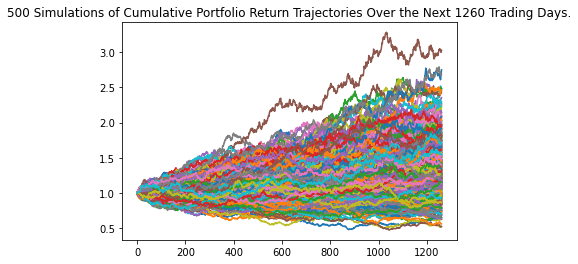

In [26]:
# Plot simulation outcomes
MC_stock_data_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

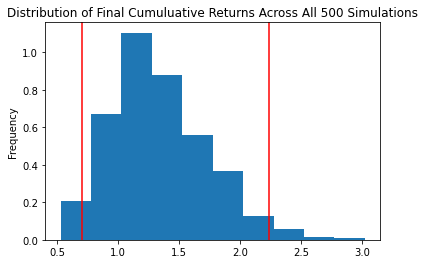

In [33]:
# Plot probability distribution and confidence intervals
MC_stock_data_5.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5yr = MC_stock_data_5.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5yr)


count           500.000000
mean              1.337782
std               0.398871
min               0.525706
25%               1.053668
50%               1.279137
75%               1.598521
max               3.024627
95% CI Lower      0.702938
95% CI Upper      2.239912
Name: 1260, dtype: float64


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [35]:
# Set initial investment
inital_investment_5yr = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower_5yr = round(even_tbl_5yr[8] * inital_investment_5yr)
even_ci_upper_5yr = round(even_tbl_5yr[9] * inital_investment_5yr)

# Print results
print(f"There is a 95% chance that an initial investment of ${inital_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower_5yr} and ${even_ci_upper_5yr}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $70294 and $223991


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data_10 = MCSimulation(
    portfolio_data = his_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 110.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 120.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 130.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 140.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 150.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 160.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 170.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 180.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 190.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 200.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 210.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 220.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 230.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 240.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 250.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 260.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 270.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 280.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 290.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 300.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 310.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 320.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 330.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 340.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 350.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 360.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 370.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 380.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 390.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 400.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 410.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 420.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 430.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 440.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 450.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 460.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 470.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 480.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

Running Monte Carlo simulation number 490.


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/crockett/Documents/Education/Fintech/Homework/05-APIs

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002497  1.005991  1.008010  0.993701  1.003620  0.997955  0.999648   
2     1.004692  1.006105  1.006563  0.980480  1.006670  0.994051  1.010688   
3     1.012495  1.008162  0.994419  0.989343  1.022858  0.990498  0.996859   
4     1.010118  0.999583  0.991122  0.991160  1.021677  1.002890  0.992261   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.169813  1.562138  1.463317  1.074437  1.086326  3.512168  1.951064   
2517  1.153470  1.566048  1.463975  1.066688  1.091650  3.525899  1.951869   
2518  1.145858  1.561396  1.471553  1.059883  1.088395  3.567176  1.960261   
2519  1.162565  1.539013  1.475072  1.058180  1.092696  3.581207  1.977146   
2520  1.172444  1.548409  1.479883  1.059028  1.105311  3.605045  2.003694   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006516  1.005724  1.013748  ...  0.991305  1.011001  0.997142   
2     0.994034  1.009761  1.012525  ...  0.997577  1.005640  1.001425   
3     0.986951  1.007140  1.005715  ...  0.997667  1.005229  1.007395   
4     1.003303  1.024151  1.013163  ...  0.998907  1.015294  1.008582   
...        ...       ...       ...  ...       ...       ...       ...   
2516  0.887720  1.711656  1.339834  ...  1.580136  2.629767  2.006614   
2517  0.884988  1.719705  1.336660  ...  1.570545  2.645708  2.018715   
2518  0.891069  1.729366  1.332353  ...  1.584889  2.632520  2.006806   
2519  0.901065  1.751884  1.330212  ...  1.588251  2.625729  2.009802   
2520  0.902064  1.768463  1.319153  ...  1.600205  2.632837  2.007056   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997554  1.010757  1.005965  0.995796  0.995336  0.998765  0.978811  
2     1.005537  1.016695  1.008714  0.999894  0.993651  1.006702  0.976611  
3     1.018277  1.003596  1.016467  0.993725  0.993122  1.007456  0.966840  
4     1.022002  1.008458  1.020344  1.002943  0.996900  1.016794  0.961520  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.017116  3.529375  2.248671  1.805977  3.805887  0.958119  0.937482  
2517  1.014802  3.574465  2.242833  1.814663  3.846183  0.962071  0.931193  
2518  1.013562  3.541128  2.226610  1.850432  3.863105  0.967570  0.939023  
2519  1.022380  3.575384  2.241789  1.869978  3.917719  0.982167  0.924888  
2520  1.031689  3.562761  2.243550  1.884484  3.887030  0.984533  0.926680  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

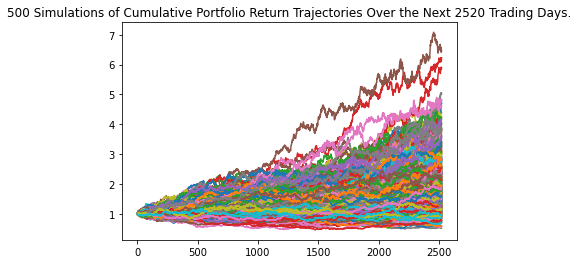

In [38]:
# Plot simulation outcomes
MC_stock_data_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

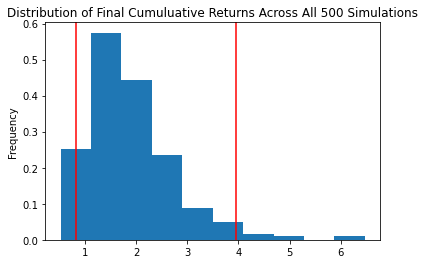

In [39]:
# Plot probability distribution and confidence intervals
MC_stock_data_10.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10yr = MC_stock_data_10.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10yr)

count           500.000000
mean              1.895392
std               0.848574
min               0.519344
25%               1.317607
50%               1.719341
75%               2.278104
max               6.472745
95% CI Lower      0.818356
95% CI Upper      3.956604
Name: 2520, dtype: float64


/Users/crockett/Documents/Education/Fintech/Homework/05-APIs/Unit-5-Financial-Planning/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [41]:
# Set initial investment
inital_investment_10yr = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower_10yr = round(even_tbl_10yr[8] * inital_investment_10yr)
even_ci_upper_10yr = round(even_tbl_10yr[9] * inital_investment_10yr)



# Print results
print(f"There is a 95% chance that an initial investment of ${inital_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower_10yr} and ${even_ci_upper_10yr}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $40918 and $197830
